In [1]:
#import

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets, svm,cluster

In [3]:
'''資料整理'''
global important
datas = pd.read_csv('nutrients_csvfile.csv',thousands=',')

#把一些不合理的資料去除
datas=datas.drop([82][:]) 
datas=datas.drop([30][:])
datas=datas.drop([31][:])
datas=datas.drop([100][:])
datas=datas.drop([42][:]) 
#此data的t,t',a,-1都為極小的意思，所以將他們替代為零
datas["Calories"] = datas["Calories"].replace('t','0')
datas["Protein"] = datas["Protein"].replace('t','0')
datas["Protein"] = datas["Protein"].replace('-1','0')
datas["Fat"] = datas["Fat"].replace('t','0') 
datas["Fat"] = datas["Fat"].replace("t'",'0')
datas["Fat"] = datas["Fat"].replace("-1",'0')
datas["Sat.Fat"] = datas["Sat.Fat"].replace('t','0')
datas["Sat.Fat"] = datas["Sat.Fat"].replace('nan','0')
datas["Fiber"] = datas["Fiber"].replace('t','0')
datas["Fiber"] = datas["Fiber"].replace('a','0')
datas["Carbs"] = datas["Carbs"].replace('t','0')

 
data  =np.array(datas).astype(str) 

#資料型態轉換(本來很多都是object)
for i in range(data.shape[0]):
    for j in range(3,data.shape[1]):
        data[i][j] = data[i][j].replace("," ,"")
        data[i][j] = data[i][j].replace("8-44" ,"26")#8~44取平均
              
data = pd.DataFrame(data)
#轉成float方便之後運算
#4:蛋白質5:脂質6:飽和脂肪7:纖維8:碳水
data[2] = data[2].astype(float) 
data[3] = data[3].astype(float) 
data[4] = data[4].astype(float) 
data[5] = data[5].astype(float) 
data[6] = data[6].astype(float) 
data[7] = data[7].astype(float) 
data[8] = data[8].astype(float)
data["Protein_Per_Kcal"] = (data[4]/data[3]).astype(float)  
data["Fiber_Per_Kcal"] = (data[7]/data[3]).astype(float)  
data["Carbs_Per_Kcal"] = (data[8]/data[3]).astype(float)

#data.info()
data = np.array(data)        
    
        
    
    
 
 
 


 

 

In [4]:
'''利用Greedy來做食物排序'''
#建立一個儲存個食物屬性的class
class Item(object): 
    def __init__ (self, n, g, v, w): 
        self.name = n 
        self.gram = g
        self.value = v 
        self.weight = w 
    
    def getName(self): 
        return self.name
    def getgram(self):
        return self.gram
    def getValue(self): 
        return self.value 
    def getWeight(self): 
        return self.weight 
    def __str__ (self): 
        result='{0:40} {1:>10} {2:>10} {3:>10}'.format(self.name,self.gram,self.value,self.weight)
        return result 
 
 #取在意營養素的值    
def value(item):
        return item.getValue() 
 #取密度(在意的值與卡路里的比值)
def density(item):
    if(item.getWeight()==0):
        return 0
    else:
        return item.getValue()/item.getWeight() 
 #greedy function : items = item; maxWeight = 最多卡路里; keyFunction = 在這裡我是用 density
def greedy(items, maxWeight, keyFunction): 
    #依keyFunction大小排序
    itemsCopy = sorted(items, key=keyFunction, reverse =True) 
    result = [] 
    totalValue, totalWeight = 0.0, 0.0
    #找到你在意的營養素最大值的過程
    for i in range(len(itemsCopy)): 
        #最後加總要小於maxWeight且getValue不能等於零(避免一些沒有熱量也沒有此營養素的item被算進來)
        if (totalWeight + itemsCopy[i].getWeight())<= maxWeight and itemsCopy[i].getValue() != 0  : 
            result.append(itemsCopy[i]) 
            totalWeight += itemsCopy[i].getWeight() 
            totalValue += itemsCopy[i].getValue() 
    return (result, totalValue,totalWeight) 


 #greedy function : items = item; maxWeight = 最多卡路里; keyFunction = 在這裡我是用 density;important在意的營養素輸入
def testGreedy(items, maxWeight, keyFunction,important):
    #call greedy
    taken, val, weight = greedy(items, maxWeight, keyFunction)
    item = []
    #將回傳的item以str形式append入 list
    for items in taken:
        item.append('{:10}'.format(str(items)))
        print(items)
    if important == 4:
        out = "總蛋白質攝取: "+str(val)+'g'+"\n"+"總卡路里攝取: "+str(weight)+'kcal'
        
    elif important ==5:
        out = "總脂質攝取: "+str(val)+'g'+"\n"+"總卡路里攝取: "+str(weight)+'kcal'
    elif important ==6:
        out = "總飽和脂質攝取: "+str(val)+'g'+"\n"+"總卡路里攝取: "+str(weight)+'kcal' 
    elif important ==7:
        out = "總纖維攝取: "+str(val)+'g'+"\n"+"總卡路里攝取: "+str(weight)+'kcal'  
    elif important ==8:
        out = "總碳水化合物攝取: "+str(val)+'g'+"\n"+"總卡路里攝取: "+str(weight)+'kcal'  
    print("總卡路里攝取: ",weight,'kcal')
    return item,out

def testGreedys(maxWeight,important): 
    #建立item
    items = buildItems(important) 
    print(maxWeight,'大卡， 建議攝取食物項目有:')
    if important ==4:
        k = '{0:<40}, {1:^10}, {2:^10}, {3:^10}'.format('品項','依序為: 克重','蛋白質(g)','熱量(kcal)')
    elif important ==5:
        k ='{0:<40}, {1:^10}, {2:^10}, {3:^10}'.format('品項','依序為: 克重','脂質(g)','熱量(kcal)') 
    elif important ==6:
        k ='{0:<40}, {1:^10}, {2:^10}, {3:^10}'.format('品項','依序為: 克重','飽和脂肪(g)','熱量(kcal)')
    elif important ==7:
        k ='{0:<40}, {1:^10}, {2:^10}, {3:^10}'.format('品項','依序為: 克重','纖維(g)','熱量(kcal)')
    elif important ==8:
        k ='{0:<40}, {1:^10}, {2:^10}, {3:^10}'.format('品項','依序為: 克重','碳水化合物(g)','熱量(kcal)')
    item,out = testGreedy(items, maxWeight,density,important)
    return item,out,k
                                                    


 

In [5]:
#buildItems function
def buildItems(x): 
    names = data[:,0]  
    gram = data[:,2]
    values = data[:,x]                                       
    weights =data[:,3] 
    Items = [] 
    for i in range(len(values)):
        Items.append(Item(names[i],gram[i] ,values[i], weights[i])) 
    return Items 

In [6]:
testGreedys(200,4)#測試

200 大卡， 建議攝取食物項目有:
Shrimp                                         85.0       23.0      110.0
Bouillon                                      240.0        5.0       24.0
Stalk raw                                      40.0        1.0        5.0
Mushrooms canned                              120.0        2.0       12.0
Spinach                                       100.0        3.0       26.0
Watercress stems, raw                          50.0        1.0        9.0
Endive                                         57.0        1.0       10.0
總卡路里攝取:  196.0 kcal


(['Shrimp                                         85.0       23.0      110.0',
  'Bouillon                                      240.0        5.0       24.0',
  'Stalk raw                                      40.0        1.0        5.0',
  'Mushrooms canned                              120.0        2.0       12.0',
  'Spinach                                       100.0        3.0       26.0',
  'Watercress stems, raw                          50.0        1.0        9.0',
  'Endive                                         57.0        1.0       10.0'],
 '總蛋白質攝取: 36.0g\n總卡路里攝取: 196.0kcal',
 '品項                                      ,  依序為: 克重  ,   蛋白質(g)  ,  熱量(kcal) ')

In [7]:
'''體態預測'''
import numpy as np 
import pandas as pd
import matplotlib as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
HM = pd.read_csv("500_Person_Gender_Height_Weight_Index.csv")
HM['calculated_BMI'] = (HM['Weight']/(HM['Height']/100)**2)
HM['deviation_from_avg_BMI'] = HM['calculated_BMI'] - HM['calculated_BMI'].mean()

from sklearn import preprocessing
#利用LabelEncoder方式進行預處理 
#沒進行此處理gender欄位不會是 1 and 0
le = preprocessing.LabelEncoder()
le.fit(HM['Gender'])
features_names = HM.columns.values.tolist()
HM['Gender'] = le.transform(HM['Gender'])
#使'Gender','calculated_BMI'為X,而目標Y為'Index'
X = HM[['Gender','calculated_BMI']]
Y = HM['Index']

#rain_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X,Y, test_size=0.33)


In [8]:
'''演算法選擇:KNN'''
k_value_scores = []
#利用交叉比對的方式來找到最佳K值
for k in range(3,20):
    knn_model = KNeighborsClassifier(n_neighbors = k, weights='uniform', algorithm='auto', leaf_size=30, p=2,  metric_params=None, n_jobs=1)
    accuracy = cross_val_score(knn_model, X, Y, cv=10, scoring='accuracy')
  
    k_value_scores.append(accuracy.mean())
print("最佳K值: " ,k_value_scores.index(max(k_value_scores))+3,max(k_value_scores))
    

最佳K值:  5 0.9700000000000001


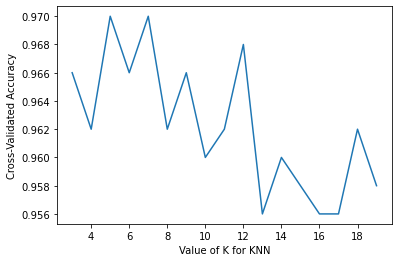

In [9]:
#印出來
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(3,20,1), k_value_scores)

plt.xlabel('Value of K for KNN')

plt.ylabel('Cross-Validated Accuracy')

plt.show()


 


    
    

In [10]:
#利用KNN來分類
knn_model = KNeighborsClassifier(n_neighbors = 5, weights='uniform',\
                                 algorithm='auto', leaf_size=30, p=2,\
                                  metric_params=None\
                                 , n_jobs=1)

knn_model.fit(X_train,Y_train)
#預測
predicted = knn_model.predict(X_train)
#準確度
print('訓練集: ',knn_model.score(X_train,Y_train))
print('測試集: ',knn_model.score(X_test,Y_test))

訓練集:  0.982089552238806
測試集:  0.9636363636363636


In [11]:
'''
#與介面連結的function
def boby_message(gender, height, weight, work):
    X = np.zeros(4)
    # gender and BMI 
    X =[[gender, weight/(height/100)**2]] 
    #預測
    index = knn_model.predict(X)
    
    if index ==2:
        print("正常")
        if work == 0:
            sug_cal = 30* weight
        elif work == 1:
            sug_cal = 35* weight
        elif work ==2:
            sug_cal = 40* weight
    elif index == 1:
        print("過瘦")
        if work == 0:
            sug_cal = 35* weight
        elif work == 1:
            sug_cal = 40* weight
        elif work ==2:
            sug_cal = 45* weight
    elif index == 0:
        print("重度過瘦")
        if work == 0:
            sug_cal = 35* weight
        elif work == 1:
            sug_cal = 40* weight
        elif work ==2:
            sug_cal = 45* weight
    elif index == 3:
        print("過重")
        if work == 0:
            sug_cal = 25* weight
        elif work == 1:
            sug_cal = 30* weight
        elif work ==2:
            sug_cal = 35* weight
    elif index == 4:
        print("肥胖")
        if work == 0:
            sug_cal = 20* weight
        elif work == 1:
            sug_cal = 30* weight
        elif work ==2:
            sug_cal = 35* weight
    elif index == 5:
        print("重度肥胖")
        if work == 0:
            sug_cal = 20* weight
        elif work == 1:
            sug_cal = 30* weight
        elif work ==2:
            sug_cal = 35* weight
    
    testGreedys(int(sug_cal/3),4)
    
        
        
            
        

'''


'\n#與介面連結的function\ndef boby_message(gender, height, weight, work):\n    X = np.zeros(4)\n    # gender and BMI \n    X =[[gender, weight/(height/100)**2]] \n    #預測\n    index = knn_model.predict(X)\n    \n    if index ==2:\n        print("正常")\n        if work == 0:\n            sug_cal = 30* weight\n        elif work == 1:\n            sug_cal = 35* weight\n        elif work ==2:\n            sug_cal = 40* weight\n    elif index == 1:\n        print("過瘦")\n        if work == 0:\n            sug_cal = 35* weight\n        elif work == 1:\n            sug_cal = 40* weight\n        elif work ==2:\n            sug_cal = 45* weight\n    elif index == 0:\n        print("重度過瘦")\n        if work == 0:\n            sug_cal = 35* weight\n        elif work == 1:\n            sug_cal = 40* weight\n        elif work ==2:\n            sug_cal = 45* weight\n    elif index == 3:\n        print("過重")\n        if work == 0:\n            sug_cal = 25* weight\n        elif work == 1:\n            sug_cal

In [12]:
#boby_message(1, 165, 60, 1)

In [13]:
 '''Greedy改版:適用於第二個功能'''

class Item2(object): 
    def __init__ (self, n, g, v,nv, w): 
        self.name = n 
        self.gram = g
        self.value = v 
        self.nonvalue = nv
        self.weight = w 
    
    def getName(self): 
        return self.name
    def getgram(self):
        return self.gram
    def getValue(self): 
        return self.value 
    def getnonValue(self):
        return self.nonvalue
    def getWeight(self): 
        return self.weight 
    def __str__ (self): 
        result='{:40} {:^8}, {:^8}, {:^8}, {:^8}'.format(self.name,self.gram,self.value,self.nonvalue,self.weight)
        return result 
 
    
def value2(item2):
        return item2.getValue() 

def densityn2(item2):
    if(item2.getWeight()==0):
        return 0
    else:
        return item2.getnonValue()/item2.getWeight() 

def density2(item2):
    if(item2.getWeight()==0):
        return 0
    else:
        return (item2.getValue()-item2.getnonValue())/item2.getWeight() 

def greedy2(items2, maxWeight, keyFunction,keyFunction2): 
   
    itemsCopy = sorted(items2, key=keyFunction, reverse =True)
    result = [] 
    totalValue,totalValue2, totalWeight = 0.0, 0.0 ,0.0
    for i in range(len(itemsCopy)): 
        if (totalWeight + itemsCopy[i].getWeight())<= maxWeight and itemsCopy[i].getValue() != 0: 
            result.append(itemsCopy[i]) 
            totalWeight += itemsCopy[i].getWeight() 
            totalValue += itemsCopy[i].getValue()
            totalValue2 +=itemsCopy[i].getnonValue()
    return (result, totalValue,totalValue2,totalWeight) 



def testGreedy2(items2, maxWeight, keyFunction,keyFunction2,important,important2): 
    taken, val,val2, weight = greedy2(items2, maxWeight, keyFunction,keyFunction2)
    items = []
    for items2 in taken:
        #label_show['text']=str(items2)
        items.append('{:10}'.format(str(items2)))
    if important == 4:
        out = "總蛋白質攝取: "+str(val)+'g'+"\n"+"總卡路里攝取: "+str(weight)+'kcal'
    elif important ==5:
        print("總脂質攝取: ",val,'g')
    elif important ==6:
        print("總飽和脂質攝取: ",val,'g')
    elif important ==7:
        print("總纖維攝取: ",val,'g')
    elif important ==8:
        print("總碳水化合物攝取: ",val,'g')
    print("總卡路里攝取: ",weight,'kcal')
    return items,out

def testGreedys2(maxWeight,important,important2):                                          
    items2 = buildItems2(important,important2) 
    sugg_text='一餐'+str(maxWeight)+'大卡， 建議攝取食物項目有:'
    # important 只會等於4(其他用不到做來備用):蛋白質，因為生酮飲食為高蛋白低碳水，低碳水飲食為高蛋白低脂肪且碳水不能過量
    if important ==4:
        if important2==8:
            k = '{0:<35} {1:>6}--{2:>6}--{3:>6}--{4:>6}'.format('品項','依序:克重','蛋白質(g)','碳水化合物(g)','熱量(kcal)')
        elif important2==5:
            k = '{0:<35} {1:>6}--{2:>6}--{3:>6}--{4:>6}'.format('品項','依序:克重','蛋白質(g)','脂質(g)','熱量(kcal)')
    elif important ==5:
        k ='{0:<40} {1:^10} {2:^10} {3:^10} {4:^10}'.format('品項','克重','脂質(g)','熱量(kcal)') 
    elif important ==6:
        k ='{0:<40} {1:^10} {2:^10} {3:^10} {4:^10}'.format('品項','克重','飽和脂肪(g)','熱量(kcal)')
    elif important ==7:
        k ='{0:<40} {1:^10} {2:^10} {3:^10} {4:^10}'.format('品項','克重','纖維(g)','熱量(kcal)')
    elif important ==8:
        k ='{0:<40} {1:^10} {2:^10} {3:^10} {4:^10}'.format('品項','克重','碳水化合物(g)''熱量(kcal)')
    items,out=testGreedy2(items2, maxWeight,density2,densityn2,important,important2)
    return sugg_text, k,items,out
    


In [14]:
#大致與 buildItems差不多 差別在於多了一個nonvalue:y，用來儲存要越少越好的營養素
def buildItems2(x,y): 
    names = data[:,0]  
    gram = data[:,2]
    values = data[:,x]
    nonvalue = data[:,y]
    weights =data[:,3] 
    Items2 = [] 
    for i in range(len(values)):
        Items2.append(Item2(names[i],gram[i] ,values[i],nonvalue[i], weights[i])) 
    return Items2 

In [15]:
############與介面連結的function
'''功能一'''
#純計算卡路里以及給些提醒  #work:工作強度
def boby_message_easy(gender, height, weight, work):
    X = np.zeros(4)
    #weight/(height/100)**2 =BMI
    X =[[gender, weight/(height/100)**2]] 
    #預測
    index = knn_model.predict(X)
    
    if index ==2:
        s = "正常,請繼續保持"+"\n"
        if work == 0:
            sug_cal = 30* weight
        elif work == 1:
            sug_cal = 35* weight
        elif work ==2:
            sug_cal = 40* weight
    elif index == 1:
        s = "過瘦"+"\n"
        if work == 0:
            sug_cal = 35* weight
        elif work == 1:
            sug_cal = 40* weight
        elif work ==2:
            sug_cal = 45* weight
    elif index == 0:
        s="重度過瘦"+"\n"+"嚴重過瘦可能會引起許多疾病其中包括:"+"\n"+"1.骨質疏鬆"+"\n"+'2.免疫功能下降'+"\n"+"3.貧血"+"\n"+"4.腎功能受損"+'\n'+"5.胃下垂"+'\n'+"6.皮膚鬆弛"+"\n"
        if work == 0:
            sug_cal = 35* weight
        elif work == 1:
            sug_cal = 40* weight
        elif work ==2:
            sug_cal = 45* weight
    elif index == 3:
        s = "過重"+"\n"
        if work == 0:
            sug_cal = 25* weight
        elif work == 1:
            sug_cal = 30* weight
        elif work ==2:
            sug_cal = 35* weight
    elif index == 4:
        s = "肥胖"+"\n"+"請試著利用運動以及飲食調整來改善"+"\n"
        if work == 0:
            sug_cal = 20* weight
        elif work == 1:
            sug_cal = 30* weight
        elif work ==2:
            sug_cal = 35* weight
    elif index == 5:
        s = "重度肥胖"+"\n"
        if work == 0:
            sug_cal = 20* weight
        elif work == 1:
            sug_cal = 30* weight
        elif work ==2:
            sug_cal = 35* weight
    label_show['text'] = str(s)+"建議攝取卡路里:"+str(sug_cal)+'kcal'
    

'''功能二'''
#kind 飲食方法
def boby_message_ex(gender, height, weight, work, kind):
    X = np.zeros(4)
     
    X =[[gender, weight/(height/100)**2]] 

    index = knn_model.predict(X)
    
    if index ==2:
        s = "正常,請繼續維持"+"\n"
        if work == 0:
            sug_cal = 30* weight
        elif work == 1:
            sug_cal = 35* weight
        elif work ==2:
            sug_cal = 40* weight
    elif index == 1:
        s = "過瘦"+"\n"+'須多補充營養'+"\n"



        if work == 0:
            sug_cal = 35* weight
        elif work == 1:
            sug_cal = 40* weight
        elif work ==2:
            sug_cal = 45* weight
    elif index == 0:
        s="重度過瘦"+"\n"


        if work == 0:
            sug_cal = 35* weight
        elif work == 1:
            sug_cal = 40* weight
        elif work ==2:
            sug_cal = 45* weight
    elif index == 3:
        s = "過重"+"\n"
        if work == 0:
            sug_cal = 25* weight
        elif work == 1:
            sug_cal = 30* weight
        elif work ==2:
            sug_cal = 35* weight
    elif index == 4:
        s = "肥胖"+"\n"
        if work == 0:
            sug_cal = 20* weight
        elif work == 1:
            sug_cal = 30* weight
        elif work ==2:
            sug_cal = 35* weight
    elif index == 5:
        s = "重度肥胖"+"\n"
        if work == 0:
            sug_cal = 20* weight
        elif work == 1:
            sug_cal = 30* weight
        elif work ==2:
            sug_cal = 35* weight
    if kind == 0:
        sugg_text, k,items,out=testGreedys2(int(sug_cal/3),4,8)
    else:
        sugg_text, k,items,out=testGreedys2(int(sug_cal/3),4,5)
    g = ''
    for i in items:
        g +=str(i)+"\n"
       
     
    label_show['text'] = "體重:"+str(s)+'\n'+str(sugg_text)+'\n'+str(k)+"\n"+str(g)+str(out)+'\n'+"建議一天攝取卡路里:"+str(sug_cal)+'kcal' 


    

In [16]:
import tkinter as tk
from tkinter import ttk
from PIL import ImageTk, Image

In [17]:
#建立TK物件
win = tk.Tk()

win.title("健康飲食推薦器")
win.geometry("1190x800")
win.configure(bg='Honeydew')
#背景圖片上
imgOpen = Image.open('pngtree-simple-and-technical-style-medical-safety-banner-picture-image_1010059.jpg')
imgOpen.thumbnail((1200,500))
img = ImageTk.PhotoImage(imgOpen)
tk.Label(win,image = img).place(relx =0 ,rely = 0)
#背景圖片下
imgOpen2 = Image.open('pngtree-simple-and-technical-style-medical-safety-banner-picture-image_1010059.jpg')
imgOpen2.thumbnail((1200,500))
img2 = ImageTk.PhotoImage(imgOpen2)
tk.Label(win,image = img2).place(x =0 ,y = 500)
#第一個功能變數接收
def get_message1():
    if text1_1.get("1.0",'end-0c').strip()=='' or text1_2.get("1.0",'end-0c').strip()  =='':
        w = 0
        h = 100
    else:
        w = float(text1_1.get("1.0",'end-0c').strip())  
        h =float(text1_2.get("1.0",'end-0c').strip())
    intens =comb.current()
    print(intens )
    print(h)
    gender= comb2.current() 
   
    
    boby_message_easy(gender, h, w, intens)
#第二個功能變數接收
def get_message2():
     
    w = float(text2_1.get("1.0",'end-0c').strip())  
    h =float(text2_2.get("1.0",'end-0c').strip())
  
    intens =comb.current()
    
    print(intens )
    print(h)
   
    gender= comb2.current()
    
    kind=comb5.current()
   
    #設定回傳的字串(與前面feedback的return配合)
    #label_show = tk.Label(win, text = boby_message_easy(gender, h , w , intens) ,font=('Arial', 12))
    #label_show.grid(row = 3, column = 0,columnspan=2, padx = 5,pady = 5)
    boby_message_ex(gender, h, w, intens,kind)
    
#第三個功能變數接收    
def get_message3():
    nu=comb6.current()
    car = float(text3_2.get("1.0",'end-0c').strip())

    item,out,k=testGreedys(car,nu+4)
    s=''
    for i in item:
        s+=str(i)+'\n'
        
    label_show['text'] = str(k)+'\n'+str(s)+str(out)
    
        
   
    
        
        
    
    
    
#第一排LABEL以及text
label1 = tk.Label(win, text = "初步體重分析及建議:",font=('Arial', 12))
label1.grid(row=0,column=0,padx = 5, pady =5)
label1_1 = tk.Label(win, text = "體重:",font=('Arial', 12))
label1_1.grid(row = 0, column = 1, padx = 5, pady =5)
text1_1 = tk.Text(win, width = 5, height =1 )
text1_1.grid(row = 0, column = 2 , padx = 5, pady =5)


label1_2 = tk.Label(win, text = "身高:",font=('Arial', 12))
label1_2.grid(row = 0, column = 3 , padx = 5, pady =5)
text1_2 = tk.Text(win, width = 5, height =1 )
text1_2.grid(row = 0, column = 4, padx = 5, pady =5)

#第一排工作強度選單
var = tk.StringVar()
label1_2 = tk.Label(win, text = "工作強度:輕,中,重(0,1,2)",font=('Arial', 12))
label1_2.grid(row = 0, column = 5 , padx = 5, pady =5)
comb = ttk.Combobox(win,textvariable=var,values=['0','1','2',],width = 5 ,height = 2)
comb.grid(row = 0, column = 6, padx = 5, pady =5)

#第一排按鈕
get_input = tk.Button(win , width = 10 ,height = 1, text = '確認',font=('Arial', 12),command = lambda :get_message1())
get_input.grid(row =0 ,column =12,padx =5,pady =5,columnspan =2)
#第一排性別選單                      
var2 = tk.StringVar()
label1_3 = tk.Label(win, text = "性別:男(0),女(1)",font=('Arial', 12))
label1_3.grid(row = 0, column = 8 , padx = 5, pady =5)                      
comb2 = ttk.Combobox(win,textvariable=var2,values=['0','1'],width = 5 ,height = 2)
comb2.grid(row = 0, column = 9, padx = 5, pady =5)

#結果顯示Label
label_show = tk.Label(win,bg = "mintcream",fg ="black",text ='' ,justify='left' ,font=('Time', 14))
label_show.place(x =180,y=180,width=800,height=600)



#第二排label text
label2 = tk.Label(win, text = "特殊飲食方針建議:",font=('Arial', 12))
label2.grid(row=1,column=0, padx = 5, pady =5)
label2_1 = tk.Label(win, text = "體重:",font=('Arial', 12))
label2_1.grid(row = 1, column = 1, padx = 5, pady =5)
text2_1 = tk.Text(win, width = 5, height =1 )
text2_1.grid(row = 1, column = 2 , padx = 5, pady =5)

label2_2 = tk.Label(win, text = "身高:",font=('Arial', 12))
label2_2.grid(row = 1, column = 3 , padx = 5, pady =5)
text2_2 = tk.Text(win, width = 5, height =1 )
text2_2.grid(row = 1, column = 4, padx = 5, pady =5)

# 第二排工作強度選單
var3 = tk.StringVar()
label2_2 = tk.Label(win, text = "工作強度:輕,中,重(0,1,2)",font=( 'KaiTi', 12))
label2_2.grid(row = 1, column = 5 , padx = 5, pady =5)
comb3 = ttk.Combobox(win,textvariable=var,values=['0','1','2',],width = 5 ,height = 2)
comb3.grid(row = 1, column = 6, padx = 5, pady =5)

#第二排按鈕
get_input2 = tk.Button(win , width = 10 ,height = 1, text = '確認',justify='left',font=('Arial', 12),command = lambda :get_message2())
get_input2.grid(row =1 ,column =12,padx =5,pady =5,columnspan =2)
#第二排性別選單                        
var4 = tk.StringVar()
label2_3 = tk.Label(win, text = "性別:男(0),女(1)",font=('Arial', 12))
label2_3.grid(row = 1, column = 8 , padx = 5, pady =5)                      
comb4 = ttk.Combobox(win,textvariable=var2,values=['0','1'],width = 5 ,height = 2)
comb4.grid(row = 1, column = 9, padx = 5, pady =5)

label2_4 = tk.Label(win, text = "生酮(0),低碳水(1)",font=('Arial', 12))
label2_4.grid(row = 1, column = 10 , padx = 5, pady =5)                      
comb5 = ttk.Combobox(win,textvariable=var2,values=['0','1'],width = 5 ,height = 2)
comb5.grid(row = 1, column = 11, padx = 5, pady =5)

#第三排label text
label3 = tk.Label(win, text = "特定營養素攝取:",font=('Arial', 12))
label3.grid(row=2,column=0, padx = 5, pady =5)
#第三排性別選單
var5 = tk.StringVar()
label3_1 = tk.Label(win, text = "營養素:蛋白質(0),脂肪(1),飽和脂肪(2),纖維(3),碳水(4)",font=('Arial', 12))
label3_1.place( x = 170, y =92)                      
comb6 = ttk.Combobox(win,textvariable=var2,values=['0','1','2','3','4'],width = 5 ,height = 2)
comb6.place( x = 560, y =92)
label3_2 = tk.Label(win, text = "卡路里:",font=('Arial', 12))
label3_2.place( x = 630, y =92)
text3_2 = tk.Text(win, width = 6, height =1 )
text3_2.place( x = 700, y =92)
#第三排按鈕
get_input2 = tk.Button(win , width = 10 ,height = 1, text = '確認',justify='left',font=('Arial', 12),command = lambda :get_message3())
get_input2.grid(row =2 ,column =12,padx =5,pady =5,columnspan =2)

win.mainloop()

1
178.0
總卡路里攝取:  769.0 kcal


In [18]:
from bs4 import BeautifulSoup
import requests
import csv

In [19]:
'''#爬蟲食譜 想再加上去的功能
import cfscrape as cf
import bs4 
import csv


Scraper = cf.create_scraper()
result = Scraper.get('https://icook.tw/categories/612')
Soup = bs4.BeautifulSoup(result.text, 'html.parser')
title = Soup.find_all('h2',attrs ={'class':'browse-recipe-name'})
asd = Soup.find_all('p',attrs ={"class":"browse-recipe-content-ingredient"})
for titles in title:
    print(titles.getText()) 



file = open("output.csv",'w',encoding="utf-8-sig")
writer =csv.writer(file)

writer.writerow(["標題","食材"])

for i in title:
    writer.writerow([i.text.strip()][0])
for i in asd:
    writer.writerow([i.text.strip()][1])
file.close()

#,[{"class":"browse-recipe-name"},{"class":"browse-recipe-content-ingredient"}'''

'#爬蟲食譜 想再加上去的功能\nimport cfscrape as cf\nimport bs4 \nimport csv\n\n\nScraper = cf.create_scraper()\nresult = Scraper.get(\'https://icook.tw/categories/612\')\nSoup = bs4.BeautifulSoup(result.text, \'html.parser\')\ntitle = Soup.find_all(\'h2\',attrs ={\'class\':\'browse-recipe-name\'})\nasd = Soup.find_all(\'p\',attrs ={"class":"browse-recipe-content-ingredient"})\nfor titles in title:\n    print(titles.getText()) \n\n\n\nfile = open("output.csv",\'w\',encoding="utf-8-sig")\nwriter =csv.writer(file)\n\nwriter.writerow(["標題","食材"])\n\nfor i in title:\n    writer.writerow([i.text.strip()][0])\nfor i in asd:\n    writer.writerow([i.text.strip()][1])\nfile.close()\n\n#,[{"class":"browse-recipe-name"},{"class":"browse-recipe-content-ingredient"}'